In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys

In [2]:
df=pd.read_csv('train_set.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101923 entries, 0 to 101922
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   age             101923 non-null  int64  
 1   relaxation      101923 non-null  int64  
 2   Gtp             101923 non-null  int64  
 3   triglyceride    101923 non-null  int64  
 4   eyesight(left)  101923 non-null  float64
 5   ALT             101923 non-null  int64  
 6   height(cm)      101923 non-null  int64  
 7   weight(kg)      101923 non-null  int64  
 8   waist(cm)       101923 non-null  float64
 9   hearing(left)   101923 non-null  int64  
 10  Urine protein   101923 non-null  int64  
 11  systolic        101923 non-null  int64  
 12  HDL             101923 non-null  int64  
 13  hearing(right)  101923 non-null  int64  
 14  hemoglobin      101923 non-null  float64
 15  smoking         101923 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 12.4 MB


In [3]:
#EDA for all the features
df.describe().transpose()

count        mean        std    min    25%    50%    75%  \
age             101923.0   44.322518  11.861661   20.0   40.0   40.0   55.0   
relaxation      101923.0   76.871010   8.985031   44.0   70.0   78.0   82.0   
Gtp             101923.0   36.325952  31.116333    3.0   18.0   27.0   44.0   
triglyceride    101923.0  128.027688  66.463590   11.0   77.0  115.0  166.0   
eyesight(left)  101923.0    1.006297   0.408518    0.1    0.8    1.0    1.2   
ALT             101923.0   26.560384  16.473788    1.0   16.0   22.0   32.0   
height(cm)      101923.0  165.264455   8.825500  135.0  160.0  165.0  170.0   
weight(kg)      101923.0   67.169795  12.594703   30.0   60.0   65.0   75.0   
waist(cm)       101923.0   83.024057   8.959248   51.0   77.0   83.0   89.0   
hearing(left)   101923.0    1.024106   0.153380    1.0    1.0    1.0    1.0   
Urine protein   101923.0    1.074144   0.348078    1.0    1.0    1.0    1.0   
systolic        101923.0  122.502193  12.704471   77.0  114.0  121.0  130.0   
HDL             101923.0   55.804225  13.953630   18.0   45.0   53.0   64.0   
hearing(right)  101923.0    1.023989   0.153015    1.0    1.0    1.0    1.0   
hemoglobin      101923.0   14.800910   1.426200    5.8   13.8   15.0   15.8   
smoking         101923.0    0.438331   0.496185    0.0    0.0    0.0    1.0   

                   max  
age               85.0  
relaxation       133.0  
Gtp              999.0  
triglyceride     548.0  
eyesight(left)     9.9  
ALT             1612.0  
height(cm)       190.0  
weight(kg)       130.0  
waist(cm)        127.0  
hearing(left)      2.0  
Urine protein      6.0  
systolic         199.0  
HDL              135.0  
hearing(right)     2.0  
hemoglobin        21.0  
smoking            1.0

In [4]:
#EDA for continuous variables(EDA:Exploratory Data Analysis)
df[['age', 'relaxation', 'Gtp', 'triglyceride', 'eyesight(left)', 'ALT', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'HDL', 'hemoglobin']].describe().transpose()

count        mean        std    min    25%    50%    75%  \
age             101923.0   44.322518  11.861661   20.0   40.0   40.0   55.0   
relaxation      101923.0   76.871010   8.985031   44.0   70.0   78.0   82.0   
Gtp             101923.0   36.325952  31.116333    3.0   18.0   27.0   44.0   
triglyceride    101923.0  128.027688  66.463590   11.0   77.0  115.0  166.0   
eyesight(left)  101923.0    1.006297   0.408518    0.1    0.8    1.0    1.2   
ALT             101923.0   26.560384  16.473788    1.0   16.0   22.0   32.0   
height(cm)      101923.0  165.264455   8.825500  135.0  160.0  165.0  170.0   
weight(kg)      101923.0   67.169795  12.594703   30.0   60.0   65.0   75.0   
waist(cm)       101923.0   83.024057   8.959248   51.0   77.0   83.0   89.0   
systolic        101923.0  122.502193  12.704471   77.0  114.0  121.0  130.0   
HDL             101923.0   55.804225  13.953630   18.0   45.0   53.0   64.0   
hemoglobin      101923.0   14.800910   1.426200    5.8   13.8   15.0   15.8   

                   max  
age               85.0  
relaxation       133.0  
Gtp              999.0  
triglyceride     548.0  
eyesight(left)     9.9  
ALT             1612.0  
height(cm)       190.0  
weight(kg)       130.0  
waist(cm)        127.0  
systolic         199.0  
HDL              135.0  
hemoglobin        21.0

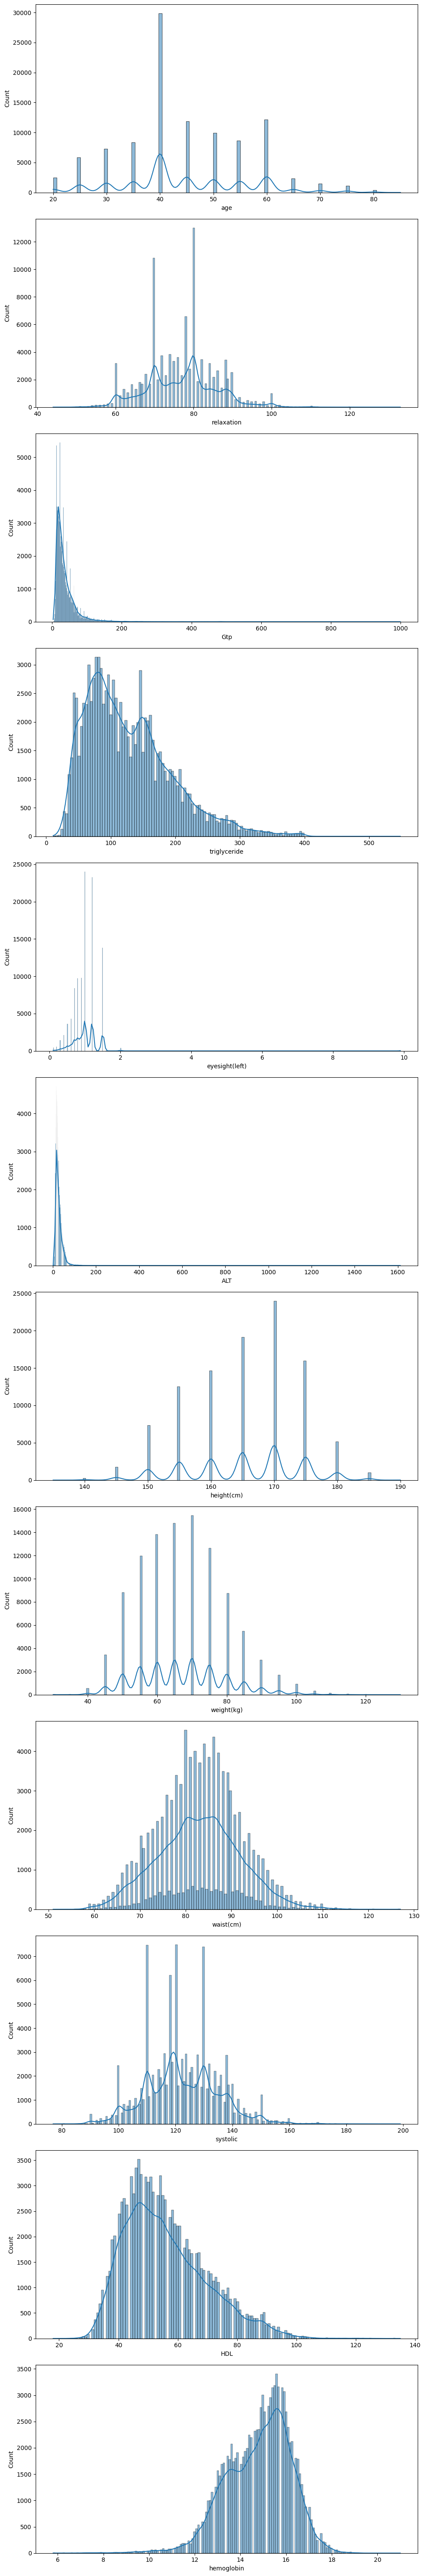

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

continous_features = ['age', 'relaxation', 'Gtp', 'triglyceride', 'eyesight(left)', 'ALT', 'height(cm)', 'weight(kg)', 'waist(cm)', 'systolic', 'HDL', 'hemoglobin']
fig, axes = plt.subplots(len(continous_features), 1, figsize=(10, 60))

for i, column in enumerate(continous_features):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
plt.tight_layout()
plt.show()


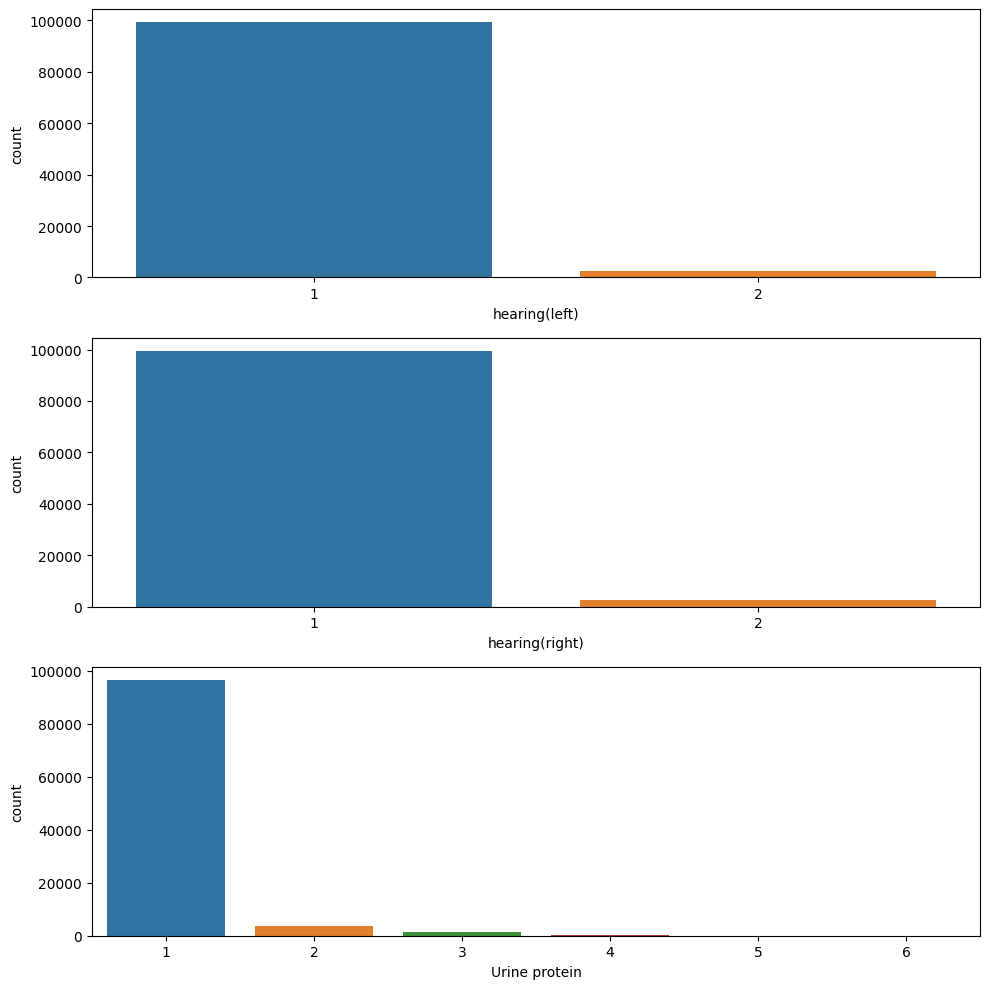

In [6]:
#plot data for categorical features

categ_feature=['hearing(left)','hearing(right)','Urine protein']

fig, axes = plt.subplots(len(categ_feature), 1, figsize=(10, 10))

for i, feature in enumerate(categ_feature):
    sns.countplot(x=feature, data=df, ax=axes[i])

plt.tight_layout()
plt.show()


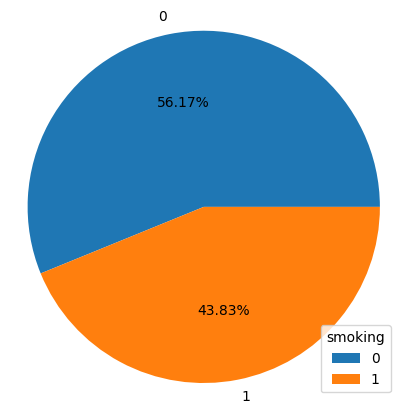

In [7]:
fig, ax=plt.subplots(1,1,figsize=(5,5))
def plot_pie(column):
    ax.pie(column.value_counts(),autopct='%1.2f%%',labels=column.value_counts().index)
    ax.legend(column.value_counts().index).set_title(column.name)
    ax.axis('equal')

plot_pie(df['smoking'])

<Axes: >

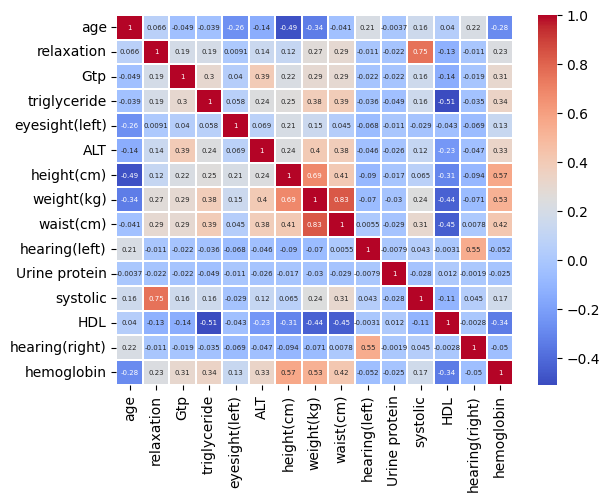

In [27]:
#constract a correlation matrix for all the features
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size':5})


In [8]:
#constract correlation matrix for continous features
corr=df[continous_features].corr()
corr.style.background_gradient(cmap='coolwarm')


<Axes: xlabel='smoking'>

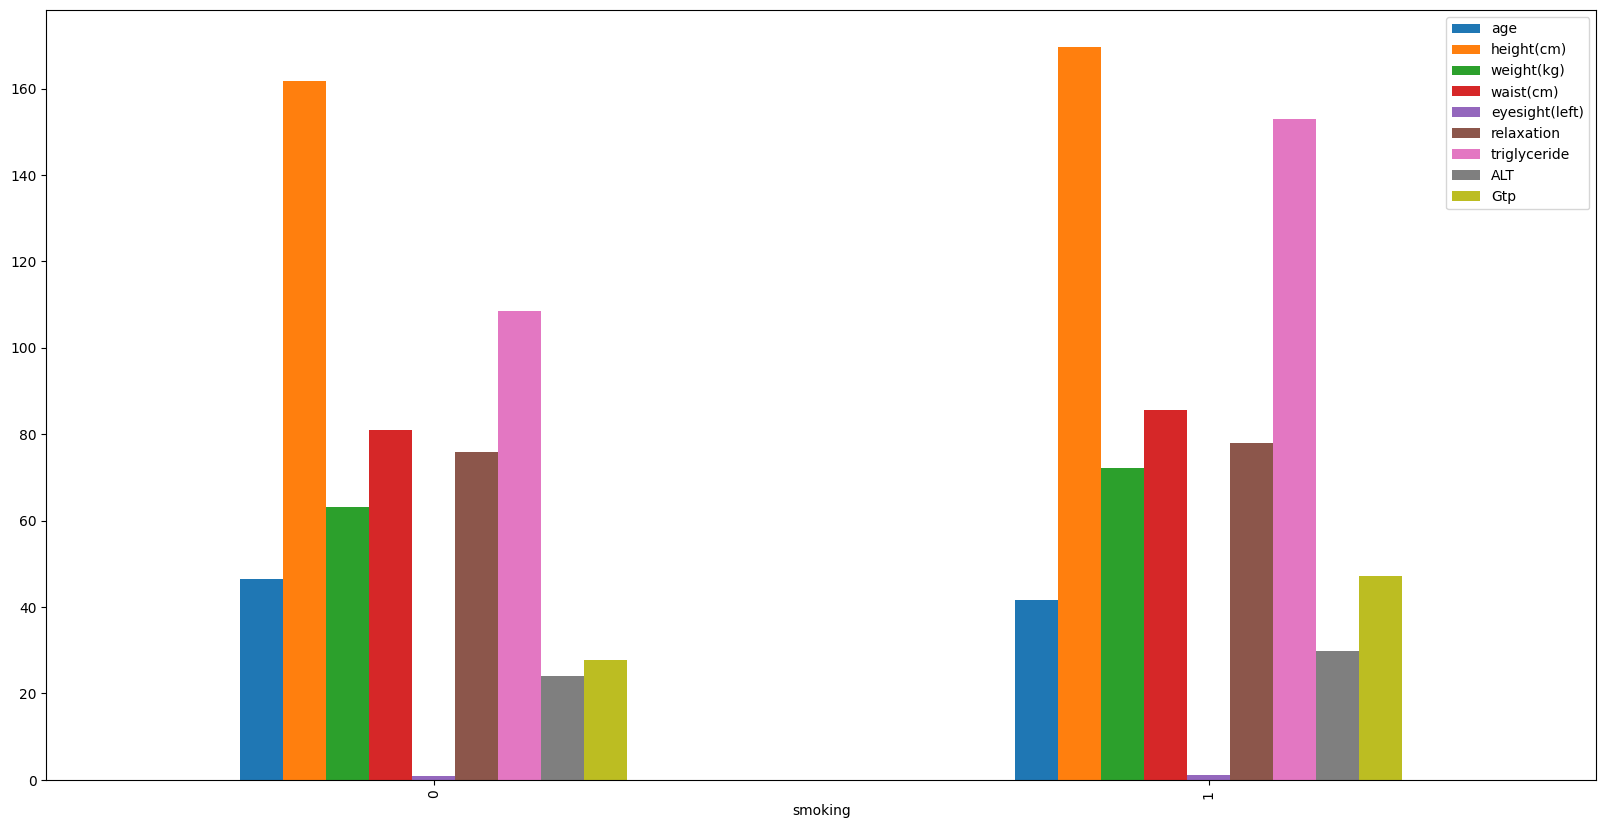

In [9]:
df.groupby(by="smoking").agg('mean')[['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp']].plot(kind='bar',figsize=(20,10))

In [10]:
df.groupby(by="smoking").agg('mean')[['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp']]

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
smoking                                                                 
0        46.482750  161.773962   63.258249  80.952956        0.970709   
1        41.554436  169.737107   72.181977  85.677928        1.051898   

         relaxation  triglyceride        ALT        Gtp  
smoking                                                  
0         75.969885    108.589149  23.983405  27.806645  
1         78.025696    152.935872  29.862476  47.242434

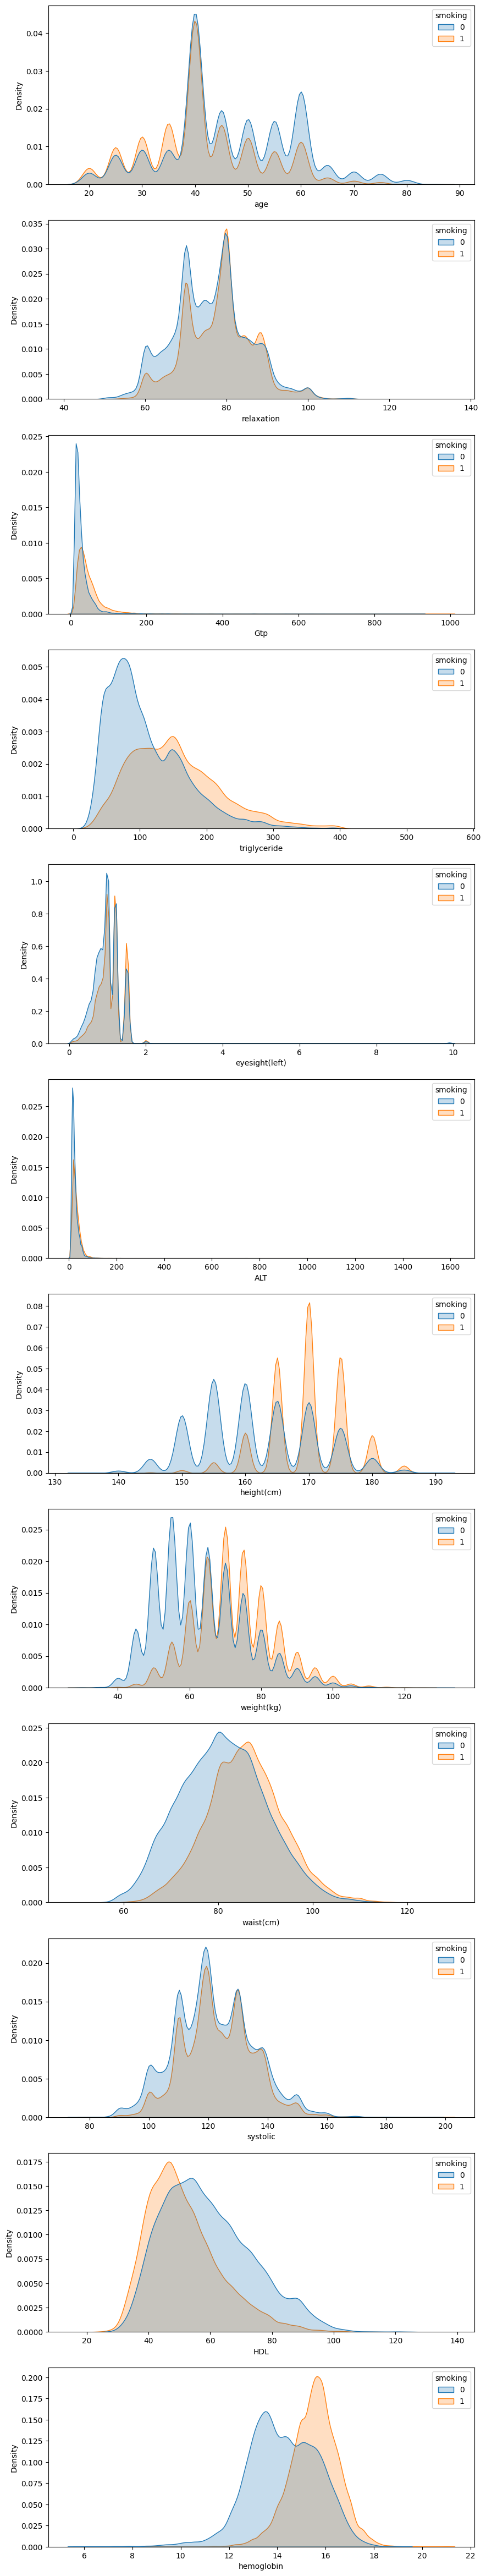

In [11]:
#plot KDE for continous features (KDE: Kernel Density Estimation, it is used for visualizing the Probability Density of a continuous variable)
fig, axes = plt.subplots(len(continous_features), 1, figsize=(10, 60))
for i, column in enumerate(continous_features):
    sns.kdeplot(data=df, x=column,hue='smoking',fill=True, ax=axes[i])

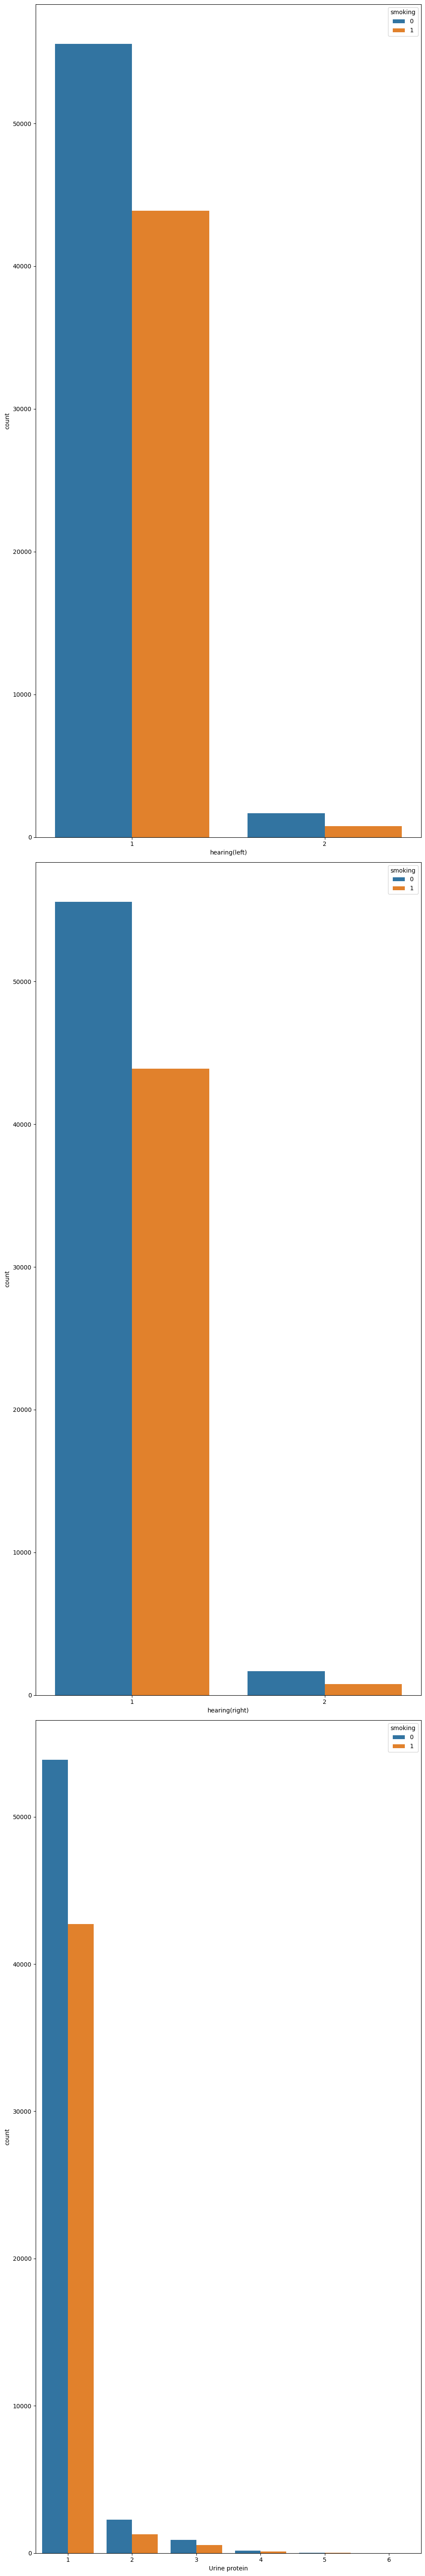

In [16]:
fig, axes = plt.subplots(len(categ_feature), 1, figsize=(10, 60))
for i,column in enumerate(categ_feature):
    sns.countplot(data=df,x=column,hue='smoking',ax=axes[i])
plt.tight_layout()
plt.show()    

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


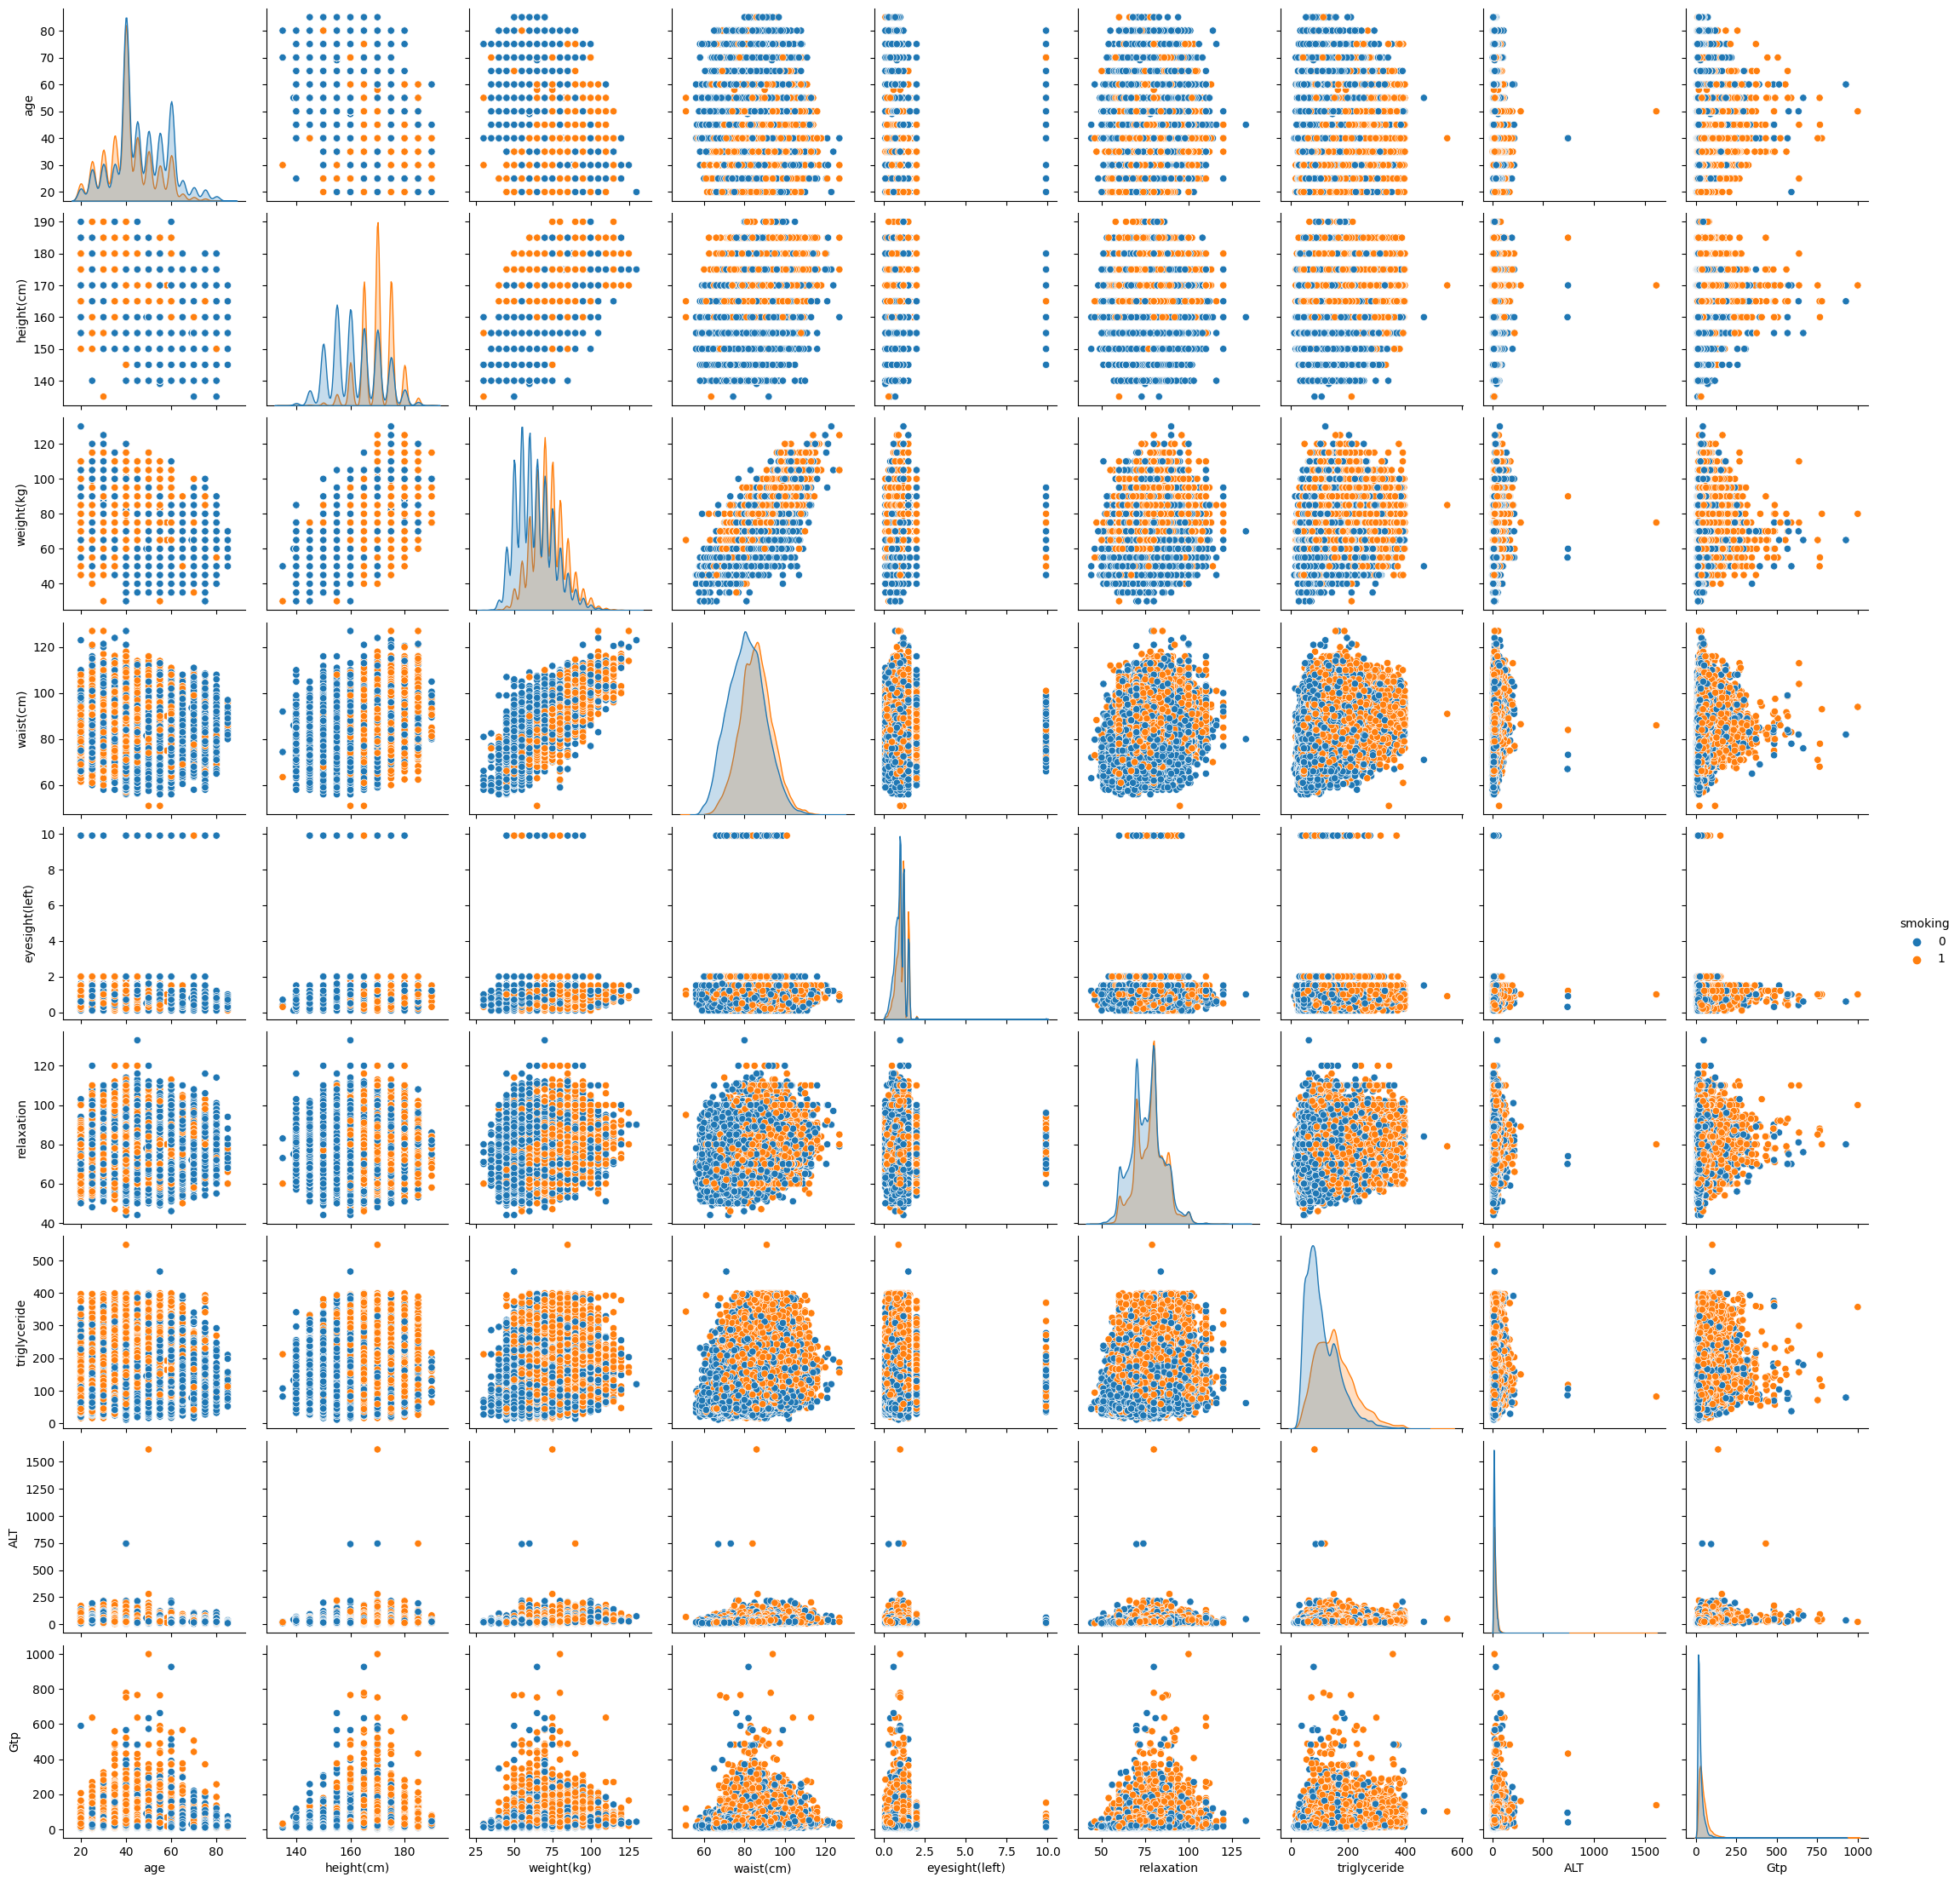

In [13]:
#plot the multivalued analysis for continous features
sns.pairplot(data=df[['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','relaxation','triglyceride','ALT','Gtp','smoking']],hue='smoking')